In [103]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

import tensorflow as tf
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras import layers

from prophet import Prophet

from datetime import datetime
from datetime import timedelta
from prophet import Prophet

In [93]:
#converte o campo str para data(months)
def parser(s):
    return datetime.strptime(s, '%m-%d')
    #return datetime.strptime(s, '%Y-%m-%d')

In [100]:
df = pd.read_csv('shampoo.csv', parse_dates=[0], date_parser=parser)
df

,Month,Sales
0,1900-01-01,266.0
1,1900-01-02,145.9
2,1900-01-03,183.1
3,1900-01-04,119.3
4,1900-01-05,180.3
5,1900-01-06,168.5
6,1900-01-07,231.8
7,1900-01-08,224.5
8,1900-01-09,192.8
9,1900-01-10,122.9


In [104]:
df = df.rename(columns={'Month': 'ds', 'Sales':'y'})

<Axes: >

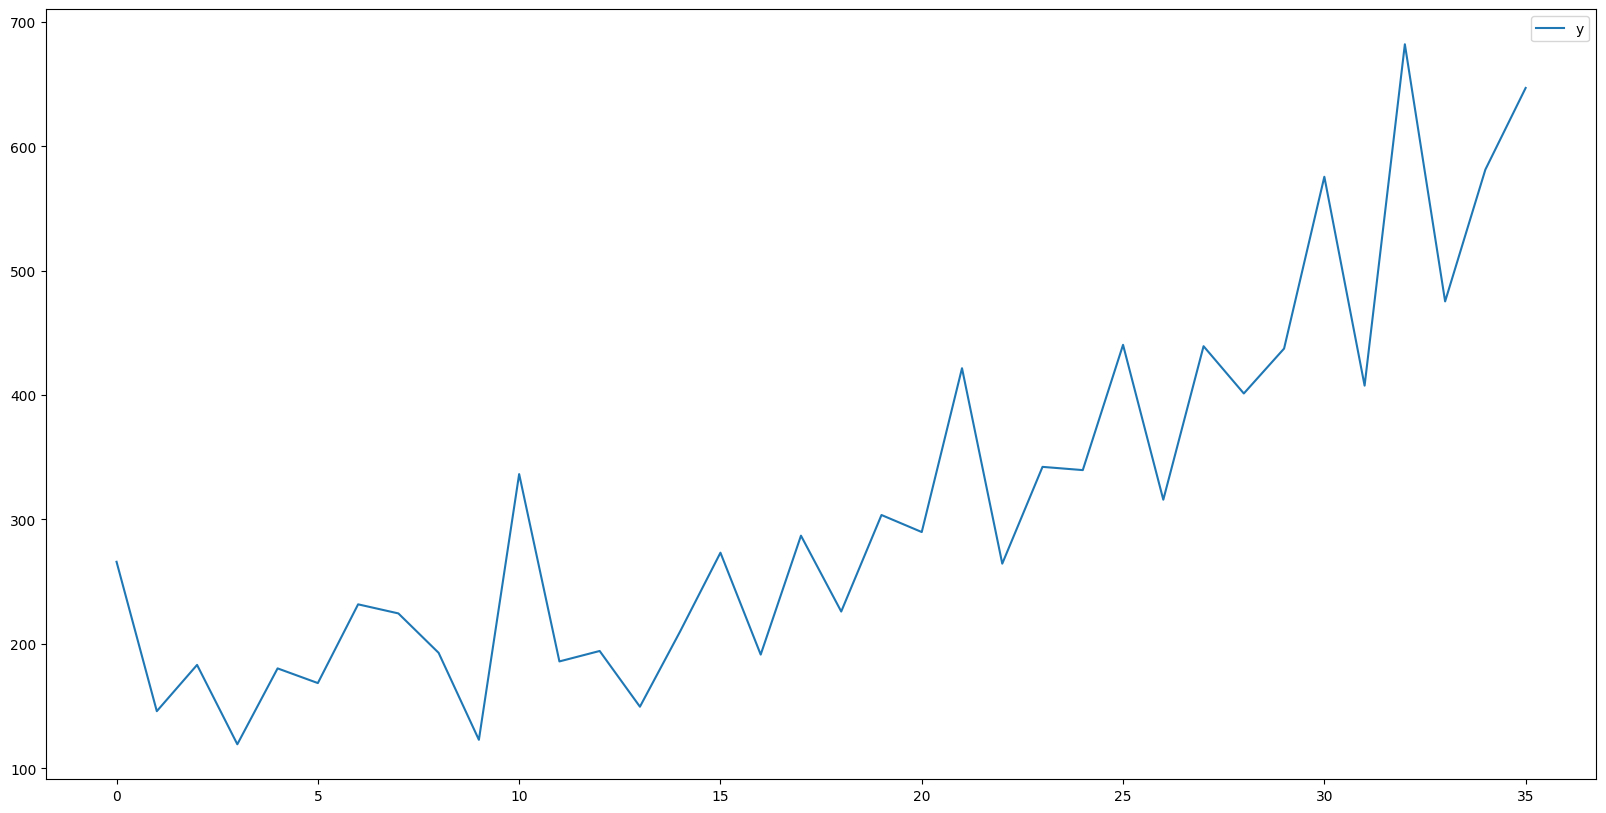

In [149]:
df.plot()

Os dados apresentam claramente um padrão crescente.


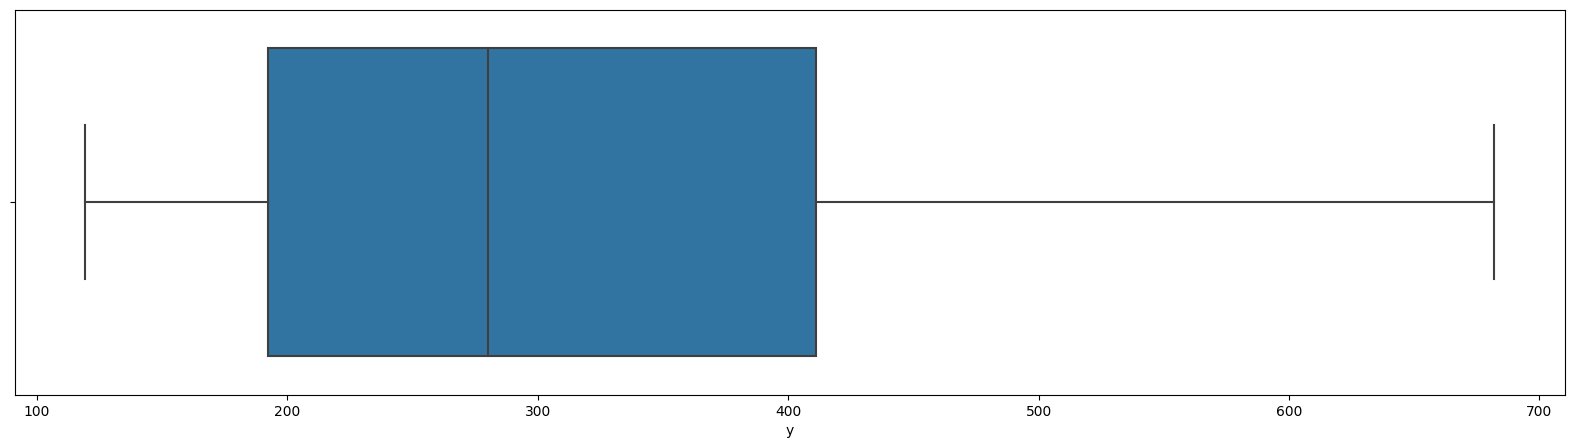

In [148]:
#Detectando outlier

import seaborn as sns
fig = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(x=df['y'],whis=1.5)

Pelo visto, nao possui nenhum outlier.

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0yz15h7h/dgnpl9ar.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0yz15h7h/u_1a8rcj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13137', 'data', 'file=/tmp/tmp0yz15h7h/dgnpl9ar.json', 'init=/tmp/tmp0yz15h7h/u_1a8rcj.json', 'output', 'file=/tmp/tmp0yz15h7h/prophet_modelwk6vglff/prophet_model-20230421024138.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:41:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:41:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


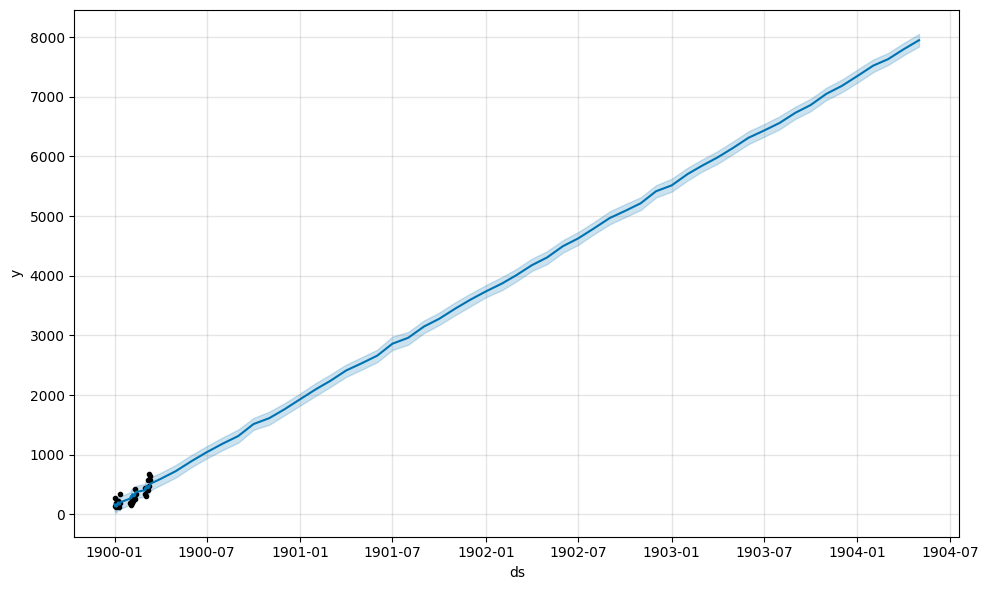

In [105]:
model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=50, freq = "MS")

forecast = model.predict(future)
fig1 = model.plot(forecast)

In [107]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='20 days', period='10 days', horizon='10 days', parallel="processes")

from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:prophet:Making 4 forecasts with cutoffs between 1900-01-31 00:00:00 and 1900-03-02 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f3a53a1e250>
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0yz15h7h/lrwn_vjs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0yz15h7h/wxvcuy_n.json
INFO:prophet:n_changepoints greater than number of observations. Using 16.
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23229', 'data', 'file=/tmp/tmp0yz15h7h/lrwn_vjs.json', 'init=/tmp/tmp0yz15h7h/wxvcuy_n.json', 'output', 'file=/tmp/tmp0yz15h7h/prophet_model98yosx87/prophet_model-20230421024250.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:42:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,9062.160712,95.195382,79.542947,0.359459,0.166469,0.278826,0.666667
1,2 days,10971.382708,104.744368,96.153446,0.455487,0.184411,0.351001,0.333333
2,3 days,4763.553587,69.018502,58.982823,0.254497,0.254497,0.213805,0.500000
3,4 days,8203.245523,90.571770,90.478661,0.271776,0.271776,0.257066,0.000000
4,5 days,54124.445171,232.646610,231.370394,0.763004,0.763004,0.636616,0.000000


In [108]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1900-02-01,346.966872,286.312462,405.916179,194.3,1900-01-31
1,1900-02-02,302.386152,246.849138,362.746084,149.5,1900-01-31
2,1900-02-03,304.923863,245.482935,365.390529,210.1,1900-01-31
3,1900-02-04,367.884440,310.279220,422.981608,273.3,1900-01-31
4,1900-02-05,398.435527,343.077336,457.762233,191.4,1900-01-31
5,1900-02-06,322.948731,264.596731,382.665841,287.0,1900-01-31
6,1900-02-07,306.640620,250.400047,362.448138,226.0,1900-01-31
7,1900-02-08,381.013483,324.669075,436.107975,303.6,1900-01-31
8,1900-02-09,336.432763,278.098873,392.031257,289.9,1900-01-31
9,1900-02-10,338.970475,278.990266,391.555964,421.6,1900-01-31


In [109]:
df = pd.read_csv('shampoo.csv')
df = df.rename(columns={'Month': 'ds', 'Sales':'y'})

In [110]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [117]:
n_steps = 3
X, y = split_sequence(list(data["y"]), n_steps)

In [141]:
# define model
n_features = 1
model = Sequential()
model.add(layers.SimpleRNN(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics='MeanSquaredError')

In [142]:
X.shape

(33, 3, 1)

In [143]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

X_train = X[1:20,:,:]
X_test = X[21:X.shape[0],:,:]

y_train = y[1:20]
y_test  = y[21:X.shape[0]]

In [144]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33, 3, 1)
(19, 3, 1)
(12, 3, 1)
(19,)
(12,)


In [145]:
model.fit(X_train, y_train, epochs=3000, verbose=1)

A saída de streaming foi truncada nas últimas 5000 linhas.
1/1 [==============================] - 0s 11ms/step - loss: 3031.9487 - mean_squared_error: 3031.9487
Epoch 502/3000
1/1 [==============================] - 0s 12ms/step - loss: 3030.1008 - mean_squared_error: 3030.1008
Epoch 503/3000
1/1 [==============================] - 0s 12ms/step - loss: 3027.9045 - mean_squared_error: 3027.9045
Epoch 504/3000
1/1 [==============================] - 0s 11ms/step - loss: 3027.0696 - mean_squared_error: 3027.0696
Epoch 505/3000
1/1 [==============================] - 0s 12ms/step - loss: 3024.0859 - mean_squared_error: 3024.0859
Epoch 506/3000
1/1 [==============================] - 0s 11ms/step - loss: 3022.4292 - mean_squared_error: 3022.4292
Epoch 507/3000
1/1 [==============================] - 0s 14ms/step - loss: 3020.9812 - mean_squared_error: 3020.9812
Epoch 508/3000
1/1 [==============================] - 0s 10ms/step - loss: 3019.3623 - mean_squared_error: 3019.3623
Epoch 509/3000
1/1 [

1/1 [==============================] - 0s 442ms/step


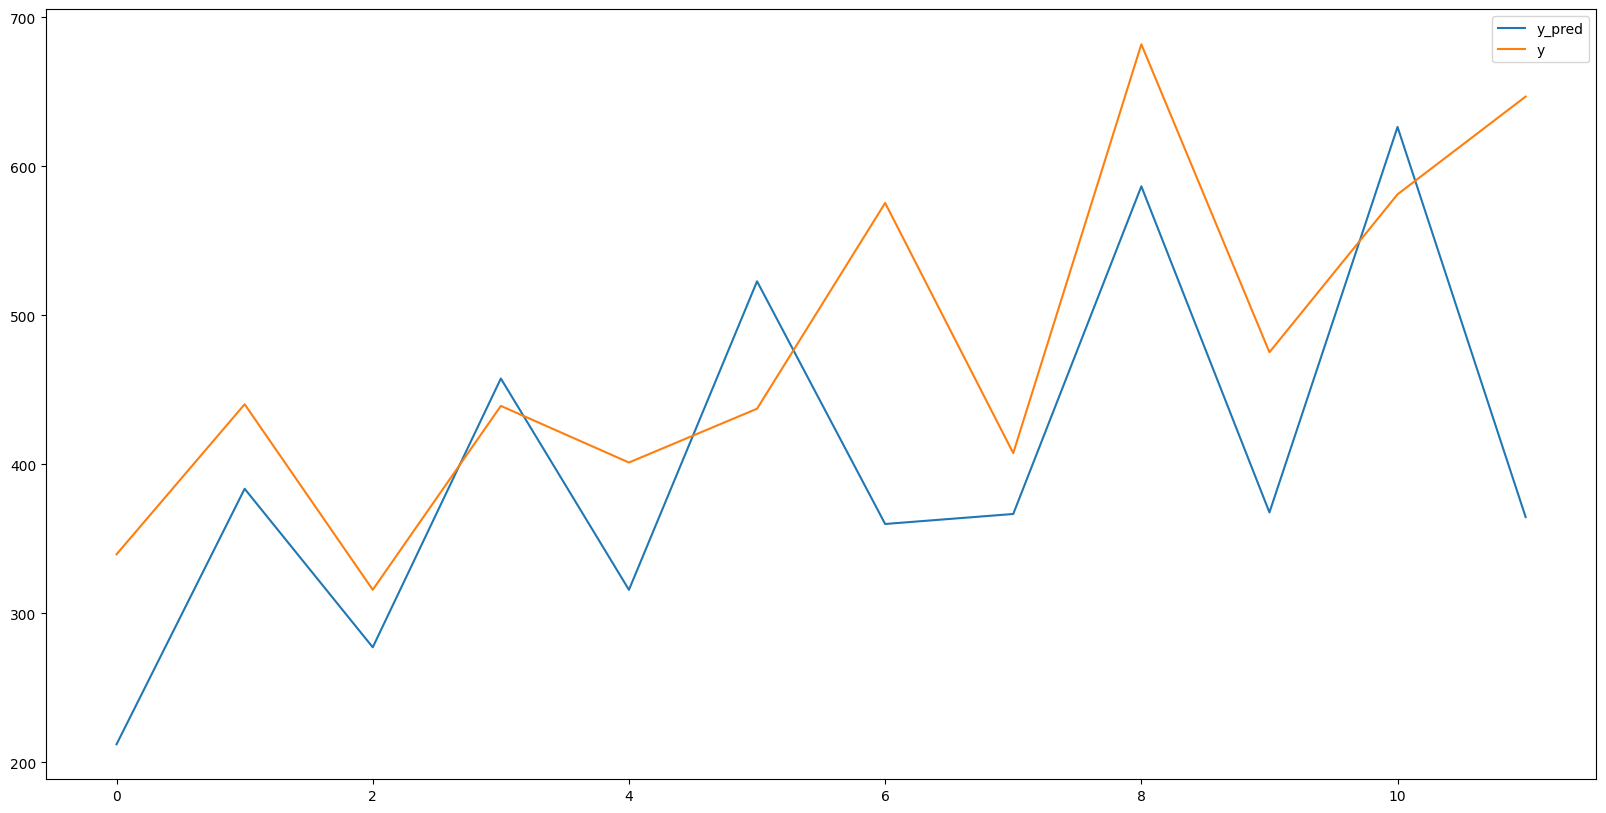

In [146]:
y_pred = model.predict(X_test)

plt.plot(y_pred, label ='y_pred')
plt.plot(y_test, label ='y')
plt.legend()

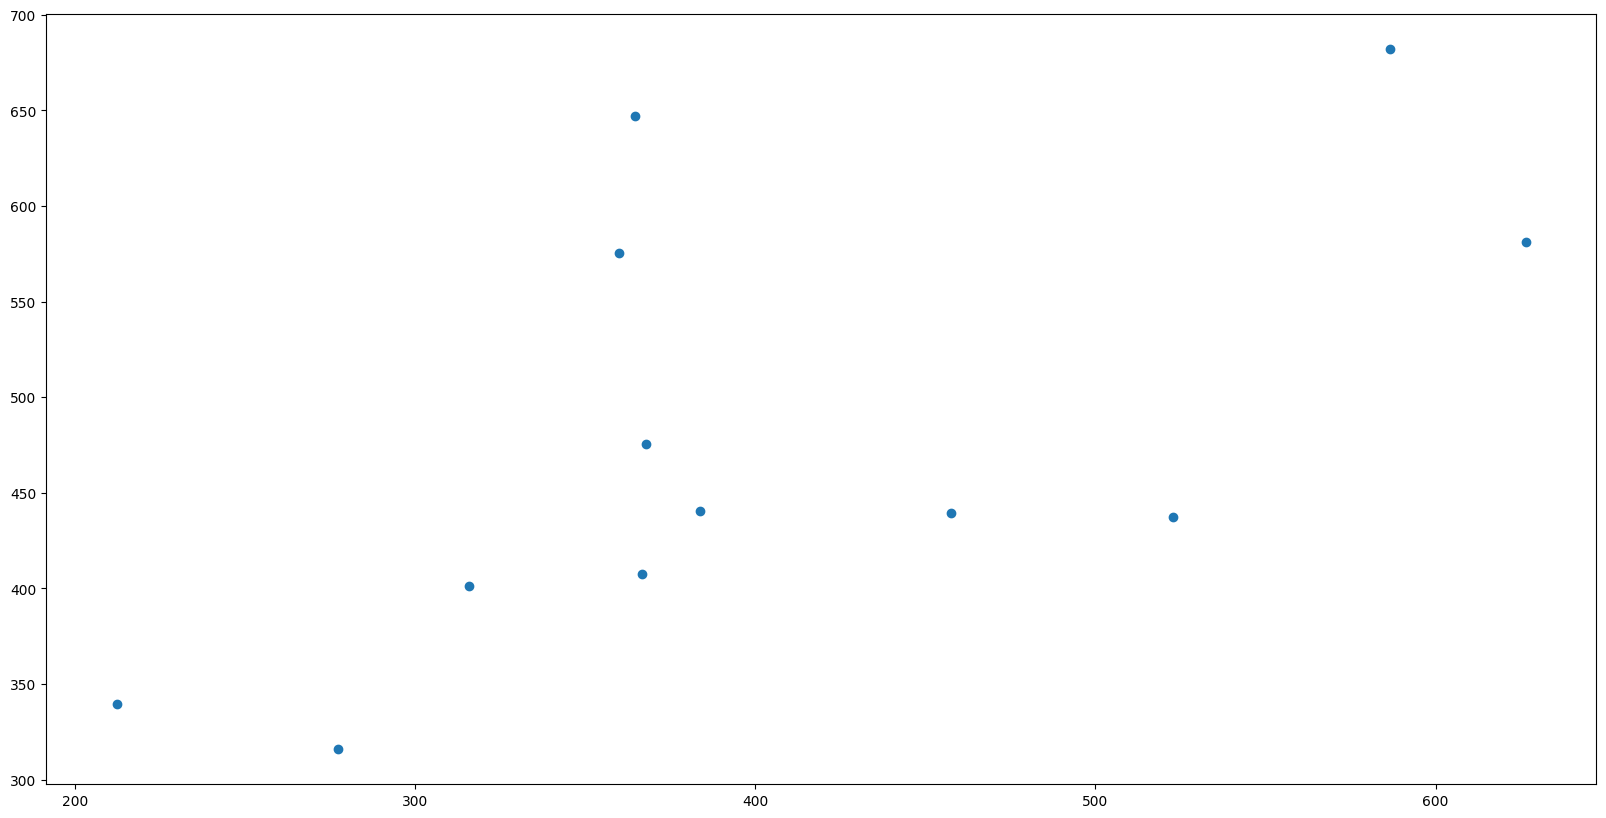

In [147]:
plt.scatter(y_pred, y_test)

O prophet é muito poderoso, mas ele precisa estar em um formato muito especifico para performar bem. 
Segundo o teste feito aqui. Parece que o RNN performou melhor, teve um erro menor e generalizou melhor.